In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
caminho ='tabela_imigrantes.xlsx'

In [4]:
tabela_original = pd.read_excel(caminho)
tabela_original

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1
0,2012-09-09 00:00:00,2016-05-27 14:23:24.160,44,Masculino,Maiores de 60 anos,Afeganistão,Liberdade,Aluguel ou pensão,Não informado,Amarela,Ensino superior incompleto,Visto permanente,Não informado,Não informado,Documentos
1,2015-06-16 00:00:00,2017-05-31 12:42:03.000,23,Masculino,18 a 29 anos,Afeganistão,Brás,Aluguel ou pensão,Foz do Iguaçu,Branca,Ensino superior incompleto,Solicitante de refúgio,Trabalhador informal ou ambulante,Serviço público,Regularização migratória
2,2010-03-05 00:00:00,2018-03-19 17:33:35.000,96,Masculino,18 a 29 anos,Afeganistão,Pari,Aluguel ou pensão,Guarulhos,Branca,Ensino fundamental incompleto,Visto permanente,"Empresário (MEI, dono de loja, restaurante, etc.)",Instituições ou organizações,Regularização migratória
3,2012-07-25 00:00:00,2018-11-27 15:39:34.004,76,Masculino,18 a 29 anos,Afeganistão,Outro Município,Casa de parente ou amigo,Guarulhos,Branca,Ensino superior incompleto,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Reinserção no mercado de trabalho
4,2008-10-10 00:00:00,2019-01-10 12:50:49.779,123,Masculino,40 a 49 anos,Afeganistão,Brás,Casa de parente ou amigo,Guarulhos,Branca,Não frequentou escola,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11829,2017-03-11 00:00:00,2017-04-26 15:03:09.000,1,Feminino,40 a 49 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Ensino fundamental completo,Indocumentado/ Irregular,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
11830,2017-03-11 00:00:00,2017-04-26 15:08:10.000,1,Masculino,18 a 29 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Ensino médio completo,Indocumentado/ Irregular,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
11831,2011-05-07 00:00:00,2016-01-27 00:00:00.000,56,Feminino,50 a 59 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Ensino superior completo,Outros,Não informado,Não informado,Não informado
11832,2011-05-14 00:00:00,2016-10-28 14:35:00.352,65,Feminino,Maiores de 60 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Ensino médio completo,Outros,Não informado,Não informado,Vaga em Centro de Acolhida


In [5]:
tabela_nova = tabela_original[['data_entrada_brasil', 'sexo', 'fx_etaria', 'pais_origem', 'distrito_moradia', 'condicoes_moradia', 'cidade_ingresso', 'cor_raca', 'situacao_migratoria']]
tabela_nova

,data_entrada_brasil,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,situacao_migratoria
0,2012-09-09 00:00:00,Masculino,Maiores de 60 anos,Afeganistão,Liberdade,Aluguel ou pensão,Não informado,Amarela,Visto permanente
1,2015-06-16 00:00:00,Masculino,18 a 29 anos,Afeganistão,Brás,Aluguel ou pensão,Foz do Iguaçu,Branca,Solicitante de refúgio
2,2010-03-05 00:00:00,Masculino,18 a 29 anos,Afeganistão,Pari,Aluguel ou pensão,Guarulhos,Branca,Visto permanente
3,2012-07-25 00:00:00,Masculino,18 a 29 anos,Afeganistão,Outro Município,Casa de parente ou amigo,Guarulhos,Branca,Visto permanente
4,2008-10-10 00:00:00,Masculino,40 a 49 anos,Afeganistão,Brás,Casa de parente ou amigo,Guarulhos,Branca,Visto permanente
...,...,...,...,...,...,...,...,...,...
11829,2017-03-11 00:00:00,Feminino,40 a 49 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Indocumentado/ Irregular
11830,2017-03-11 00:00:00,Masculino,18 a 29 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Indocumentado/ Irregular
11831,2011-05-07 00:00:00,Feminino,50 a 59 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Outros
11832,2011-05-14 00:00:00,Feminino,Maiores de 60 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Outros


In [6]:
#converter a coluna 'data_entrada_brasil' para datetime, tratando valores não reconhecidos como NaT
tabela_nova['data_entrada_brasil'] = pd.to_datetime(tabela_nova['data_entrada_brasil'], errors='coerce')

#remover linhas onde a data não pôde ser reconhecida porque tava dando erro na hr de selecionar so acima do ano 2000
tabela_nova = tabela_nova.dropna(subset=['data_entrada_brasil'])

# Remover todas as linhas em que o ano da coluna 'data_entrada_brasil' seja menor do que 2000
tabela_nova = tabela_nova.loc[tabela_nova['data_entrada_brasil'].dt.year >= 2000]

#contagem de entradas por ano
#contagem_por_ano = tabela_nova['data_entrada_brasil'].dt.year.value_counts()

display(tabela_nova)

#exibir a contagem de entradas por ano
#print(contagem_por_ano)

C:\Users\Victo.DESKTOP-IDFBQB1\AppData\Local\Temp\ipykernel_300\1048970156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_nova['data_entrada_brasil'] = pd.to_datetime(tabela_nova['data_entrada_brasil'], errors='coerce')


,data_entrada_brasil,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,situacao_migratoria
0,2012-09-09,Masculino,Maiores de 60 anos,Afeganistão,Liberdade,Aluguel ou pensão,Não informado,Amarela,Visto permanente
1,2015-06-16,Masculino,18 a 29 anos,Afeganistão,Brás,Aluguel ou pensão,Foz do Iguaçu,Branca,Solicitante de refúgio
2,2010-03-05,Masculino,18 a 29 anos,Afeganistão,Pari,Aluguel ou pensão,Guarulhos,Branca,Visto permanente
3,2012-07-25,Masculino,18 a 29 anos,Afeganistão,Outro Município,Casa de parente ou amigo,Guarulhos,Branca,Visto permanente
4,2008-10-10,Masculino,40 a 49 anos,Afeganistão,Brás,Casa de parente ou amigo,Guarulhos,Branca,Visto permanente
...,...,...,...,...,...,...,...,...,...
11829,2017-03-11,Feminino,40 a 49 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Indocumentado/ Irregular
11830,2017-03-11,Masculino,18 a 29 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Indocumentado/ Irregular
11831,2011-05-07,Feminino,50 a 59 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Outros
11832,2011-05-14,Feminino,Maiores de 60 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Outros


In [7]:
pais_origem = []
sexo = []
fx_etaria = []
cor_raca = []
distrito_moradia = []
cidade_ingresso = []
situacao_migratoria = []

for elemento_pais_origem, contagem_pais_origem in tabela_nova['pais_origem'].value_counts().items():
    pais_origem.append((elemento_pais_origem, contagem_pais_origem))
    
for elemento_sexo, contagem_sexo in tabela_nova['sexo'].value_counts().items():
    sexo.append((elemento_sexo, contagem_sexo))
    
for elemento_fx_etaria, contagem_fx_etaria in tabela_nova['fx_etaria'].value_counts().items():
    fx_etaria.append((elemento_fx_etaria, contagem_fx_etaria))

for elemento_cor_raca, contagem_cor_raca in tabela_nova['cor_raca'].value_counts().items():
    cor_raca.append((elemento_cor_raca, contagem_cor_raca))

for elemento_distrito_moradia, contagem_distrito_moradia in tabela_nova['distrito_moradia'].value_counts().items():
    distrito_moradia.append((elemento_distrito_moradia, contagem_distrito_moradia))

for elemento_cidade_ingresso, contagem_cidade_ingresso in tabela_nova['cidade_ingresso'].value_counts().items():
    cidade_ingresso.append((elemento_cidade_ingresso, contagem_cidade_ingresso))

for elemento_situacao_migratoria, contagem_situacao_migratoria in tabela_nova['situacao_migratoria'].value_counts().items():
    situacao_migratoria.append((elemento_situacao_migratoria, contagem_situacao_migratoria))


In [8]:
df_pais_origem = pd.DataFrame(pais_origem, columns=['Pais', 'Quantidade'])
df_pais_origem.head(15)

,Pais,Quantidade
0,Angola,3162
1,Haiti,1147
2,Venezuela,813
3,República Democrática do Congo,725
4,Bolívia,545
5,Nigéria,422
6,Senegal,365
7,Colômbia,348
8,Guiné-Bissau,338
9,Peru,295


In [9]:
data_entrada = tabela_nova[['data_entrada_brasil']]

df_entrada_br = pd.DataFrame(data_entrada)

df_entrada_br['data_entrada_brasil'] = pd.to_datetime(df_entrada_br['data_entrada_brasil'], errors='coerce')

df_entrada_br['ano_entrada_brasil'] = df_entrada_br['data_entrada_brasil'].dt.year

media_ano = df_entrada_br['ano_entrada_brasil'].mean()
mediana_ano = df_entrada_br['ano_entrada_brasil'].median()
moda_ano = df_entrada_br['ano_entrada_brasil'].mode()[0]

print(f'Média do ano de entrada no Brasil: {media_ano:.0f}')
print(f'Mediana do ano de entrada no Brasil: {mediana_ano:.0f}')
print(f'Moda do ano de entrada no Brasil: {moda_ano:.0f}')

Média do ano de entrada no Brasil: 2016
Mediana do ano de entrada no Brasil: 2016
Moda do ano de entrada no Brasil: 2016


In [10]:
df_idade = pd.DataFrame(fx_etaria, columns=['Faixa Etária', 'Quantidade']).sort_values(by='Quantidade', ascending=False)

arr_fx_etaria = np.array(fx_etaria)
quantidade = arr_fx_etaria[:, 1].astype(int)

porcentagens = (quantidade / quantidade.sum()) * 100

df_porcentagens = pd.DataFrame({
    'Faixa Etária': arr_fx_etaria[:, 0],
    'Porcentagem': porcentagens.round(2)
})

df_porcentagens['Porcentagem'] = df_porcentagens['Porcentagem'].map(lambda x: f"{x:.2f}%")

#display(df_idade)
#print('-'*30)
#display(df_porcentagens)

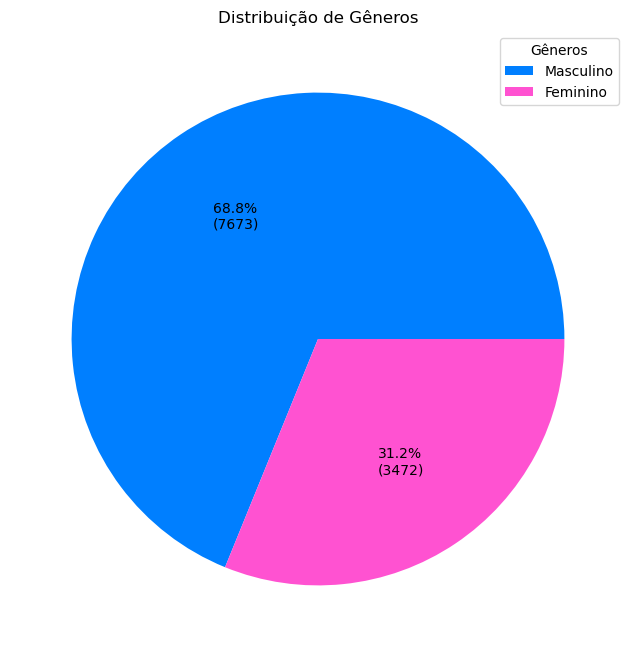

In [11]:
df_sexo = pd.DataFrame(sexo, columns=['Gênero', 'Quantidade'])
#display(df_sexo)

sexo = {
    'Masculino': df_sexo['Quantidade'][0],
    'Feminino': df_sexo['Quantidade'][1],
}

generos = list(sexo.keys())
contagens = list(sexo.values())

def formatar_texto(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(contagens, autopct=lambda pct: formatar_texto(pct, contagens), colors=['#007FFF', '#ff52d1'])
plt.title('Distribuição de Gêneros')

plt.legend(wedges, generos, title="Gêneros", loc="upper right", bbox_to_anchor=(1, 1))

plt.show()

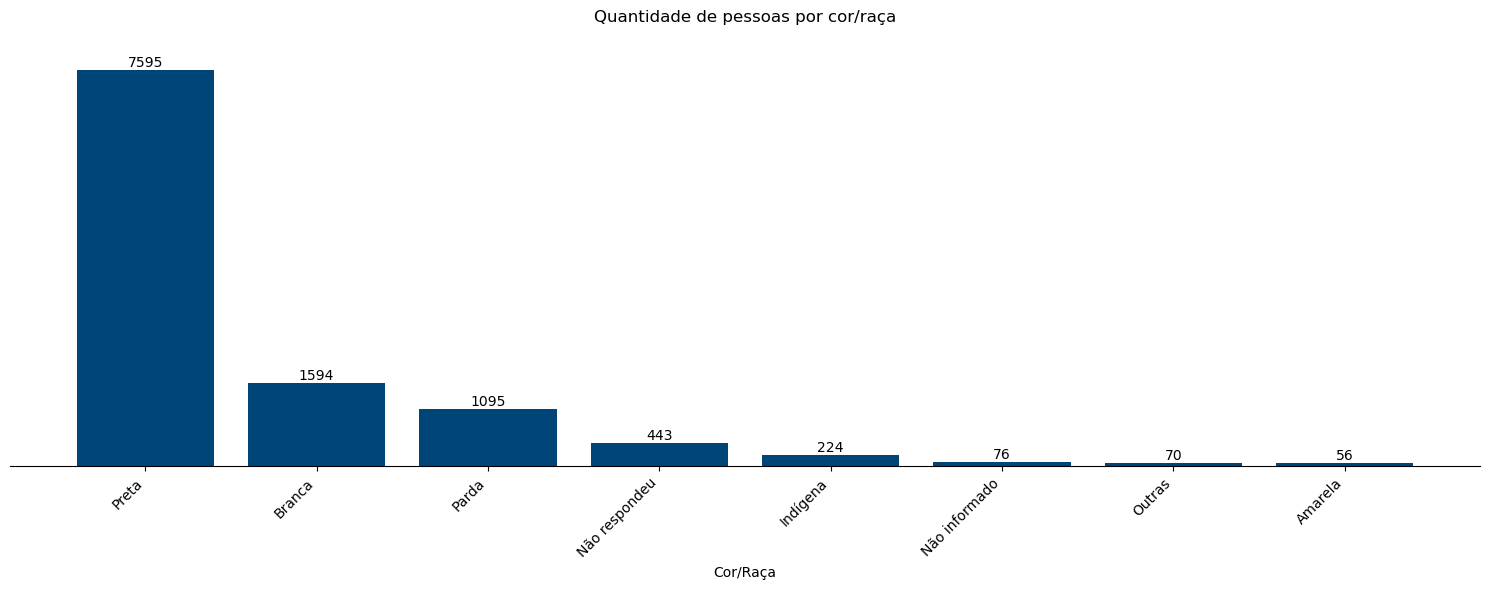

In [12]:
df_cor = pd.DataFrame(cor_raca, columns=['Cor', 'Quantidade'])
#display(df_cor)

#criar um DataFrame
df_cor = pd.DataFrame(cor_raca, columns=['Cor', 'Quantidade'])

#ordenar o DataFrame pela coluna 'Quantidade'
df_cor = df_cor.sort_values(by='Quantidade', ascending=False)

plt.figure(figsize=(15, 6))
bars = plt.bar(df_cor['Cor'], df_cor['Quantidade'], color='#004578')

#adicionar os valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

#remover as bordas do gráfico
for axis in ['top', 'right', 'left']:
    plt.gca().spines[axis].set_color(None)

plt.gca().tick_params(axis='y', labelleft=False, left=None)

# Adicionar título e rótulos dos eixos
plt.title('Quantidade de pessoas por cor/raça')
plt.xlabel('Cor/Raça')
#plt.gca().axes.get_yaxis().set_visible(False)
#plt.ylabel('Quantidade')

#rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')
#plt.gca().spines['bottom'].set_linewidth(1.5) 

#ajustar os limites do eixo y
plt.ylim(0, df_cor['Quantidade'].max() * 1.1)

plt.tight_layout()
plt.show()

,Distrito,Quantidade
0,Outro Município,1429
1,Bela Vista,1333
2,Liberdade,924
3,Brás,639
4,Artur Alvim,551
5,Sé,509
6,República,471
7,Santana,463
8,Itaquera,418
9,Penha,390


-------------------------------------------------------------------------------------------------------------------------------


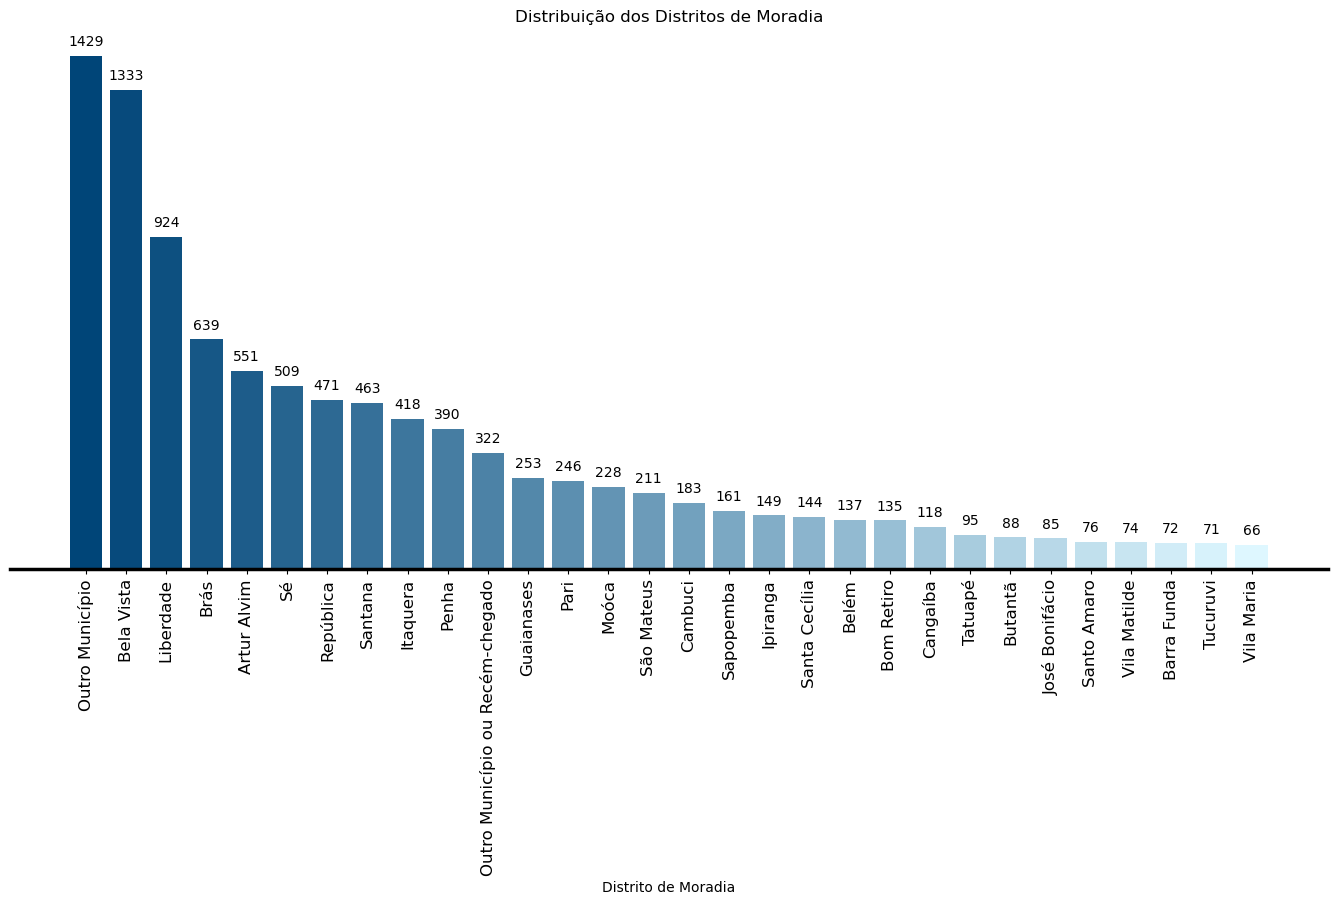

In [13]:
df_distrito_moradia = pd.DataFrame(distrito_moradia, columns=['Distrito', 'Quantidade'])
display(df_distrito_moradia.head(30))

print('-'*127)
#definindo os distritos e suas contagens
distritos = [item[0] for item in distrito_moradia[:30]]
contagens = [item[1] for item in distrito_moradia[:30]]

#mapa de cores em degradê de azul para a cor desejada
start_color = '#004578'  # Cor inicial azul
end_color = '#def7ff'    # Cor final desejada
n_colors = 100  # Número de pontos de cor no degradê

colors = [start_color, end_color]
color_map = LinearSegmentedColormap.from_list('custom', colors, N=n_colors)

#gráfico de barras com cores em degradê
plt.figure(figsize=(17, 7))
bars = plt.bar(distritos, contagens, color=color_map(np.linspace(0, 1, len(distritos))))  

plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Distrito de Moradia')
plt.title('Distribuição dos Distritos de Moradia')

#adicionando rótulos com as contagens
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, str(contagens[i]), 
             ha='center', va='bottom', fontsize=10, color='black')

#mudando as bordas e ticks
plt.gca().spines['bottom'].set_linewidth(2.5)    
for axis in ['top', 'right', 'left']:
    plt.gca().spines[axis].set_color(None)
plt.gca().tick_params(axis='y', labelleft=False, left=None)

plt.show()

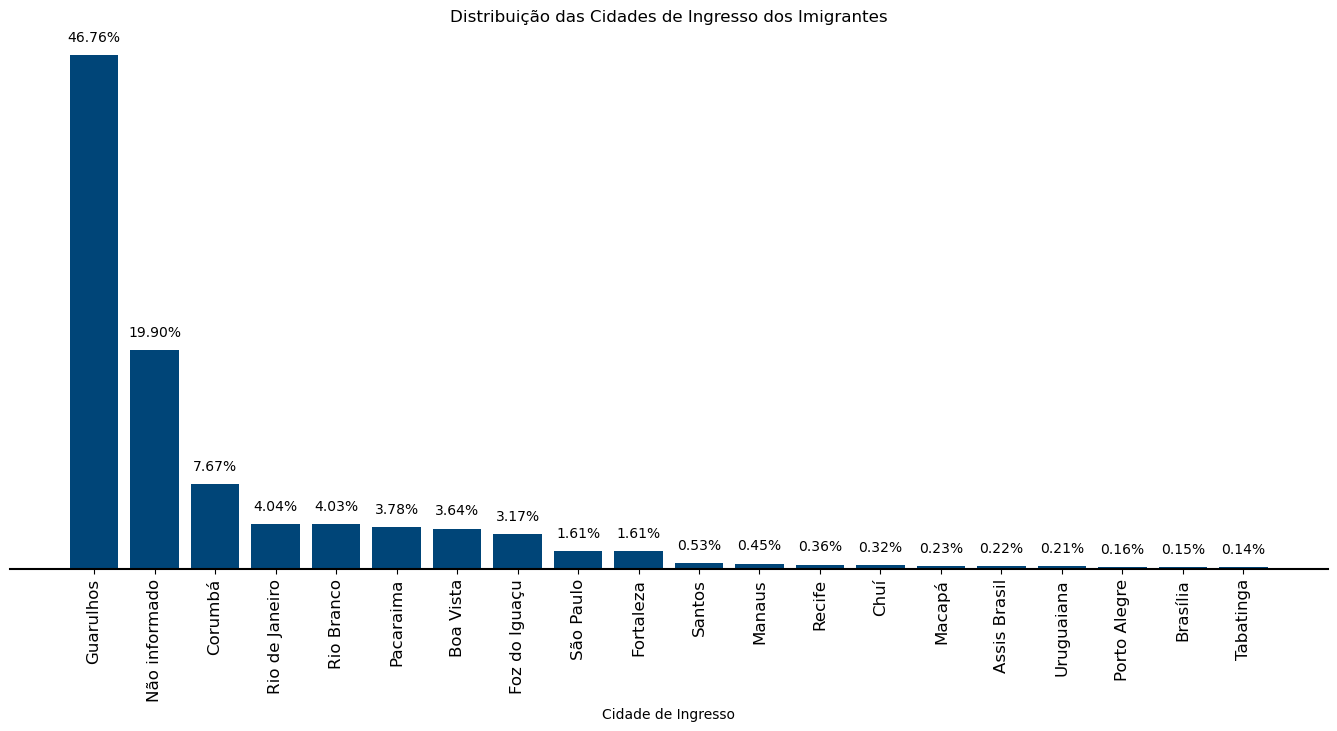

In [14]:
df_cidade_ingresso = pd.DataFrame(cidade_ingresso, columns=['Cidade', 'Quantidade'])

cidades_originais = [item[0] for item in cidade_ingresso]
contagens_originais = [item[1] for item in cidade_ingresso]

total_imigrantes = sum(contagens_originais)

porcentagens = [contagem / total_imigrantes * 100 for contagem in contagens_originais]

cidades = cidades_originais[:20]
porcentagens = porcentagens[:20]

plt.figure(figsize=(17, 7))
bars = plt.bar(cidades, porcentagens, color='#004578')

plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Cidade de Ingresso')
#plt.ylabel('Porcentagem')
plt.title('Distribuição das Cidades de Ingresso dos Imigrantes')

#adicionar os valores em porcentagem em cima de cada barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{porcentagens[i]:.2f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

for axis in ['top', 'right', 'left']:
    plt.gca().spines[axis].set_visible(False)

plt.gca().spines['bottom'].set_linewidth(1.5)

plt.gca().tick_params(axis='y', labelleft=False, left=None)

plt.show()

In [15]:
tabela_nova2 = tabela_nova[['pais_origem', 'situacao_migratoria']]
tabela_nova2.head(30)

,pais_origem,situacao_migratoria
0,Afeganistão,Visto permanente
1,Afeganistão,Solicitante de refúgio
2,Afeganistão,Visto permanente
3,Afeganistão,Visto permanente
4,Afeganistão,Visto permanente
5,Afeganistão,Refugiado
6,Afeganistão,Visto de turismo
11,África do Sul,Indocumentado/ Irregular
12,África do Sul,Solicitante de refúgio
13,África do Sul,Refugiado


,Total,Visto Permanente
Angola,3162,308
Haiti,1147,436
Venezuela,813,9
Rep. do Congo,725,84
Bolívia,545,170
Nigéria,422,41
Senegal,365,42
Colômbia,348,25
Guiné-Bissau,338,92
Peru,295,40


-------------------------------------------------------------------------------------------------------------------


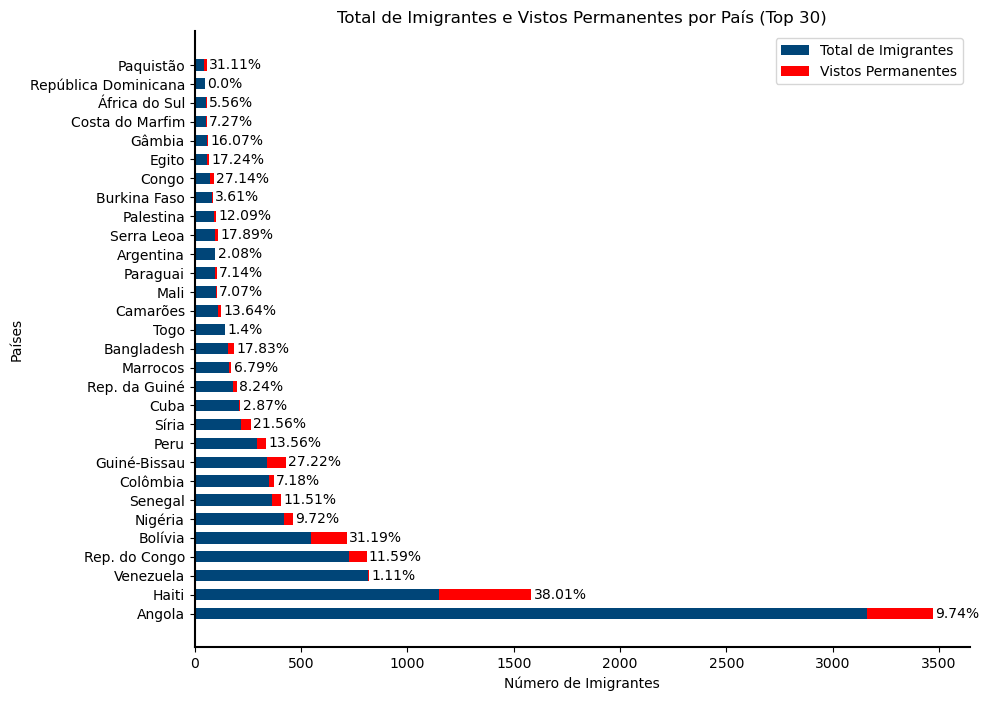

In [16]:
#contar o número total de imigrantes de cada país
total_por_pais = tabela_nova2['pais_origem'].value_counts()

#contar o número de imigrantes com visto permanente para cada país
visto_permanente_por_pais = tabela_nova2[tabela_nova2['situacao_migratoria'] == 'Visto permanente'] \
                                .groupby('pais_origem')['situacao_migratoria'].count()

#juntar os dois DataFrames para incluir países sem visto permanente
resultado = pd.DataFrame({'Total': total_por_pais, 'Visto Permanente': visto_permanente_por_pais}).fillna(0)
 
#porcentagem de imigrantes com visto permanente para cada país
resultado['Porcentagem Visto Permanente'] = (resultado['Visto Permanente'] / resultado['Total']) * 100

#arredondar para duas casas decimais
resultado['Porcentagem Visto Permanente'] = resultado['Porcentagem Visto Permanente'].round(2)

#ordenar o DataFrame pelo total de imigrantes de cada país, do maior para o menor
resultado_ordenado = resultado.sort_values(by='Total', ascending=False)

#renomear os campos do DataFrame
resultado_ordenado.columns = ['Total', 'Visto Permanente', 'Porcentagem Visto Permanente']
resultado_ordenado.index.name = None
resultado_ordenado = resultado_ordenado.rename(index={'República Democrática do Congo': 'Rep. do Congo'})
resultado_ordenado = resultado_ordenado.rename(index={'República da Guiné': 'Rep. da Guiné'})

#30 primeiros países
resultado_ordenado_por_total = resultado_ordenado.head(30)

#corrigir o tipo de dados 'Visto Permanente'
resultado_ordenado_por_total = resultado_ordenado_por_total.copy()
resultado_ordenado_por_total['Visto Permanente'] = resultado_ordenado_por_total['Visto Permanente'].astype(int)

#exibir os campos renomeados e ordenados pelo total de imigrantes
display(resultado_ordenado_por_total[['Total', 'Visto Permanente']])

print('-------------------------------------------------------------------------------------------------------------------')

plt.figure(figsize=(10, 8))

bar_width = 0.6

#barras para o total de imigrantes
plt.barh(resultado_ordenado_por_total.index, resultado_ordenado_por_total['Total'], height=bar_width, color='#004578', label='Total de Imigrantes')

#as barras para os vistos permanentes
plt.barh(resultado_ordenado_por_total.index, resultado_ordenado_por_total['Visto Permanente'], height=bar_width, left=resultado_ordenado_por_total['Total'], color='red', label='Vistos Permanentes')

plt.xlabel('Número de Imigrantes')
plt.ylabel('Países')
plt.title('Total de Imigrantes e Vistos Permanentes por País (Top 30)')
plt.legend()

for axis in ['top', 'right']:
    plt.gca().spines[axis].set_color(None)
    
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
    
#adicionar as porcentagens de visto permanente fora das barras
for i, pais in enumerate(resultado_ordenado_por_total.index):
    plt.text(resultado_ordenado_por_total['Total'][pais] + resultado_ordenado_por_total['Visto Permanente'][pais] + 10, i, f'{resultado_ordenado_por_total["Porcentagem Visto Permanente"][pais]}%', va='center', ha='left', color='black')

plt.show()


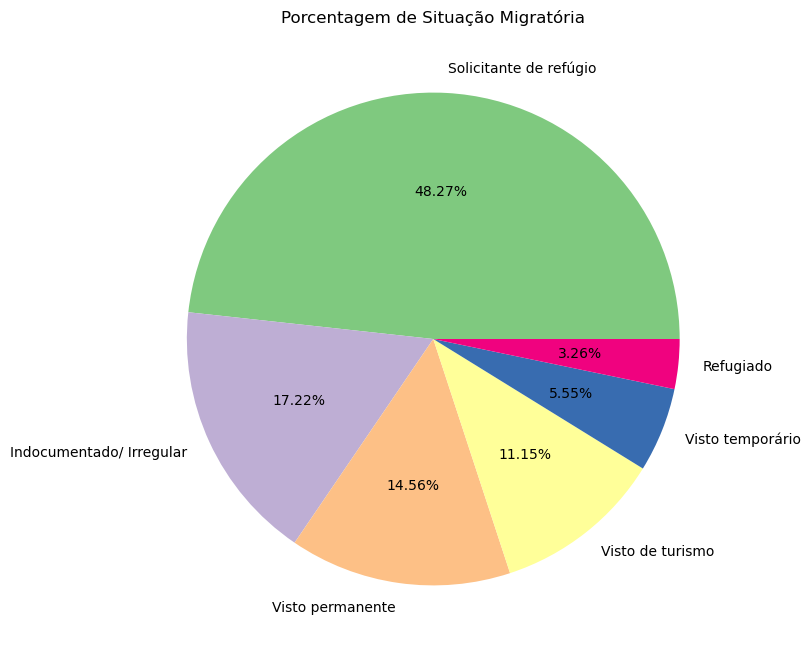

In [17]:
porcentagens_situacao_migratoria = (tabela_nova['situacao_migratoria'].value_counts() / len(tabela_nova)) * 100

colors = sns.color_palette("Accent")

porcentagens_situacao_migratoria = porcentagens_situacao_migratoria.drop(['Outros', 'Não informado'], errors='ignore')

plt.figure(figsize=(8, 8))
plt.pie(porcentagens_situacao_migratoria, labels=porcentagens_situacao_migratoria.index, autopct='%1.2f%%', colors=colors)

plt.title('Porcentagem de Situação Migratória')

plt.show()

In [18]:
#preencher os valores NaN com 0
df_entrada_br['ano_entrada_brasil'].fillna(0, inplace=True)

#coluna 'ano_entrada_brasil' para int
df_entrada_br['ano_entrada_brasil'] = df_entrada_br['ano_entrada_brasil'].astype(int)

entrada_2000_2019 = df_entrada_br[df_entrada_br['ano_entrada_brasil'] >= 2000]
entrada_2000_2019.columns = ['Data de Entrada', 'Ano de Entrada']

display(entrada_2000_2019)

entrada_2000_2019
print(entrada_2000_2019['Ano de Entrada'].min())
print(entrada_2000_2019['Ano de Entrada'].max())

#ultimas_20_linhas = tabela_nova.tail(20)
#display(ultimas_20_linhas)

,Data de Entrada,Ano de Entrada
0,2012-09-09,2012
1,2015-06-16,2015
2,2010-03-05,2010
3,2012-07-25,2012
4,2008-10-10,2008
...,...,...
11829,2017-03-11,2017
11830,2017-03-11,2017
11831,2011-05-07,2011
11832,2011-05-14,2011


2000
2019


In [19]:
for a1, a2 in df_idade.value_counts().keys():
    print(f"Faixa: {a1}, Quantidade: {a2}")


Faixa: 0 a 11 anos, Quantidade: 375
Faixa: 12 a 17 anos, Quantidade: 182
Faixa: 18 a 29 anos, Quantidade: 4003
Faixa: 30 a 39 anos, Quantidade: 4249
Faixa: 40 a 49 anos, Quantidade: 1728
Faixa: 50 a 59 anos, Quantidade: 462
Faixa: Maiores de 60 anos, Quantidade: 154


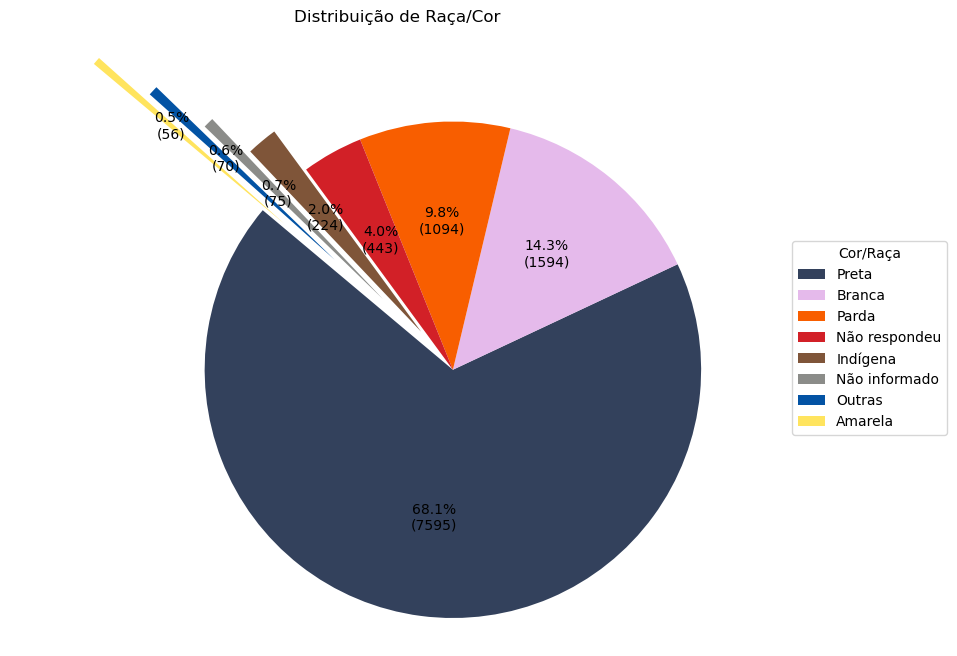

In [20]:
cor_raca_dict = {key[0]: key[1] for key in cor_raca}

# Criar um DataFrame a partir do dicionário
df_cor_1 = pd.DataFrame(list(cor_raca_dict.items()), columns=['Cor', 'Quantidade'])

cores_cor_raca = ['#33415c', '#E5BAEB', '#f85e00', '#d22027', '#7f5539', '#8b8c89', '#0353a4', '#ffe45e']


# Ordenar o DataFrame por 'Quantidade'
df_cor_1.sort_values(by='Quantidade', ascending=False, inplace=True)

# Função para formatar o texto dentro do gráfico de pizza
def formatar_texto(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

# Explodir fatias menores
explode = (0.0, 0.0, 0.0, 0, 0.2, 0.40, 0.65, 0.9)  # Explodir as fatias menores

# Função para formatar o texto
def formatar_texto(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{pct:.1f}%\n({absolute})'

# Plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(df_cor_1['Quantidade'], labels=None, autopct=lambda pct: formatar_texto(pct, df_cor_1['Quantidade']),
                                   startangle=140, colors=cores_cor_raca, explode=explode)

# Definir o título e tornar a proporção do aspecto igual
plt.title('Distribuição de Raça/Cor')
plt.axis('equal')

# Definir a cor do texto dentro do gráfico de pizza para preto
for autotext in autotexts:
    autotext.set_color('black')

# Ajustar a posição dos textos dentro das fatias
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

# Adicionar legenda
plt.legend(df_cor_1['Cor'], title="Cor/Raça", loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar o gráfico
plt.show()

In [28]:
#cópia da coluna 'data_entrada_brasil' para manter a tabela original
contagem_ano = tabela_original['data_entrada_brasil'].copy()

#substituir "Não informado" por NaN
contagem_ano = contagem_ano.replace('Não informado', np.nan)

#remover linhas com valores ausentes na cópia da coluna
contagem_ano.dropna(inplace=True)

#para o tipo datetime
contagem_ano = pd.to_datetime(contagem_ano)

contagem_ano = contagem_ano.dt.year.value_counts()
contagem_ano.head(50)

data_entrada_brasil
2016    2618
2017    1825
2018    1816
2015    1635
2014     950
2019     841
2013     560
2012     251
2011     151
2010     129
2008      95
2009      85
2006      37
2007      34
2005      29
2004      27
2003      27
2002      16
2001      16
1986      15
1996      15
1998      13
1999      12
2000      11
1997      10
1978       8
1989       8
1977       8
1993       8
1992       8
1988       7
1987       7
1995       7
1994       6
1979       5
1984       5
1985       5
1990       5
1991       5
1980       5
1982       5
1953       4
1976       4
1959       3
1983       3
1981       3
1963       3
1973       3
1968       3
1955       2
Name: count, dtype: int64

# País x Situação migratórias 

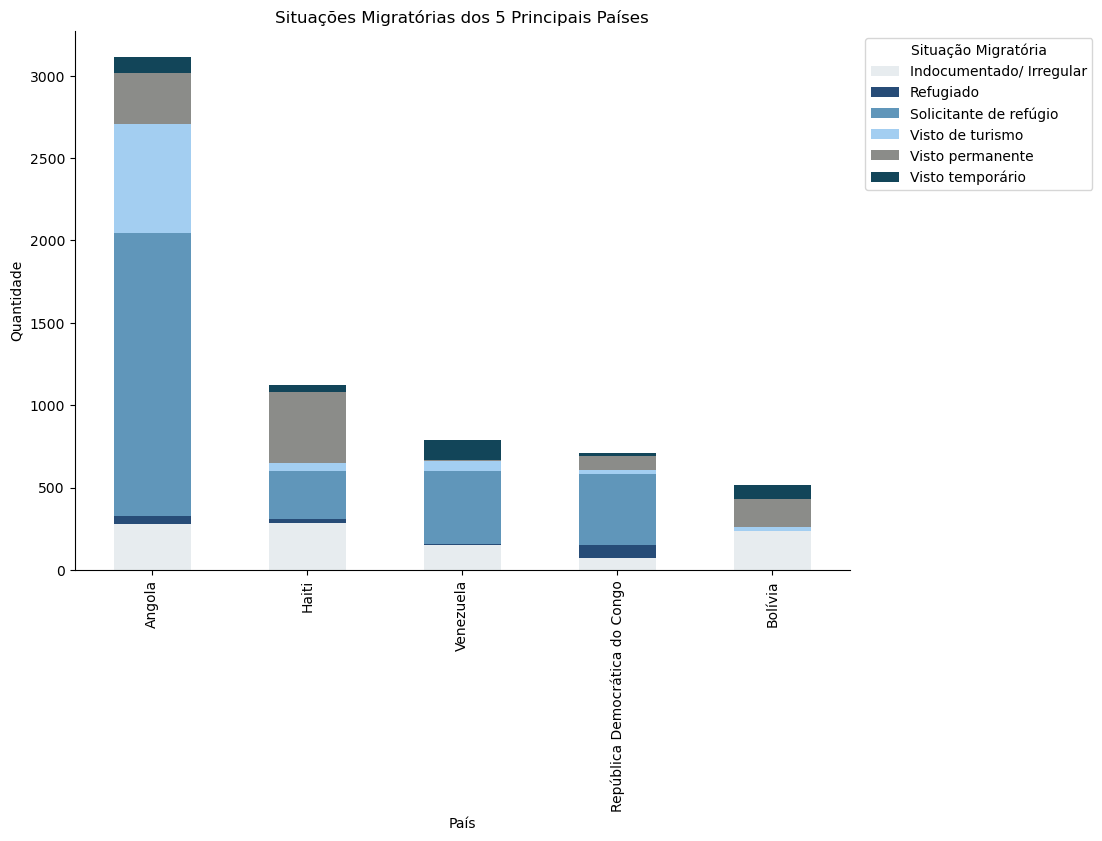

In [22]:
tabela_ps = tabela_nova[['pais_origem', 'situacao_migratoria']]

#arupar por pai de origem e situação migratoia, e contar as ocorrecias
agrupados = tabela_ps.groupby(['pais_origem', 'situacao_migratoria']).size().reset_index(name='contagem')

pais_situacao_dict = {}
for index, row in agrupados.iterrows():
    pais = row['pais_origem']
    situacao = row['situacao_migratoria']
    contagem = row['contagem']
    
    if pais not in pais_situacao_dict:
        pais_situacao_dict[pais] = {}
    
    pais_situacao_dict[pais][situacao] = contagem

#criar um dicionário para armazenar a soma das quantidades por pais
pais_total_contagem = {pais: sum(situacoes.values()) for pais, situacoes in pais_situacao_dict.items()}

#ordenar os países pela quantidade total
pais_ordenados = sorted(pais_total_contagem.items(), key=lambda item: item[1], reverse=True)

pais_situacao_dict_ordenado = {pais: pais_situacao_dict[pais] for pais, _ in pais_ordenados}

df_ordenado = pd.DataFrame.from_dict(pais_situacao_dict_ordenado, orient='index').fillna(0).astype(int)

#display(df_ordenado.head(3))

df_ordenado = pd.DataFrame.from_dict(pais_situacao_dict_ordenado, orient='index').fillna(0).astype(int)

colors = ['#e7ecef', '#274c77', '#6096ba', '#a3cef1', '#8b8c89', '#124559']

# Selecionar os três principais países
top3_paises = df_ordenado.head(5)

#remover as colunas 'Outros' e 'Não informado'
top3_paises_sem_outros = top3_paises.drop(columns=['Outros', 'Não informado'])

top3_paises_sem_outros.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)

plt.title('Situações Migratórias dos 5 Principais Países')
plt.xlabel('País')
plt.ylabel('Quantidade')
plt.legend(title='Situação Migratória', bbox_to_anchor=(1.011, 1), loc='upper left')

for axis in ['top', 'right']:
    plt.gca().spines[axis].set_color(None)

plt.show()


# País x Quantidade

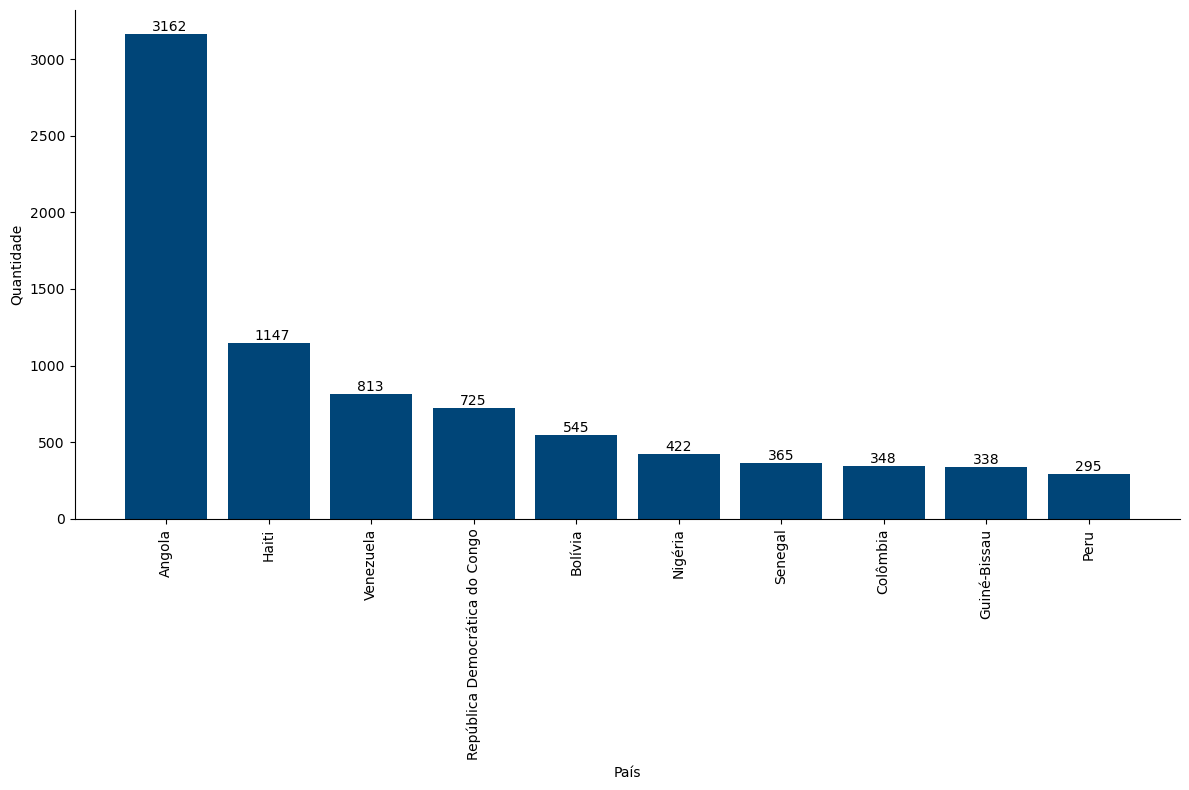

In [23]:
paises, quantidades = zip(*pais_origem[:10])

plt.figure(figsize=(12, 8))
bars = plt.bar(paises, quantidades, color='#004578')

plt.title('')
plt.xlabel('País')
plt.ylabel('Quantidade')

plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2), va='bottom')

for axis in ['top', 'right']:
    plt.gca().spines[axis].set_color(None)
    
plt.tight_layout()
plt.show()

# Pais x Cor/Raca

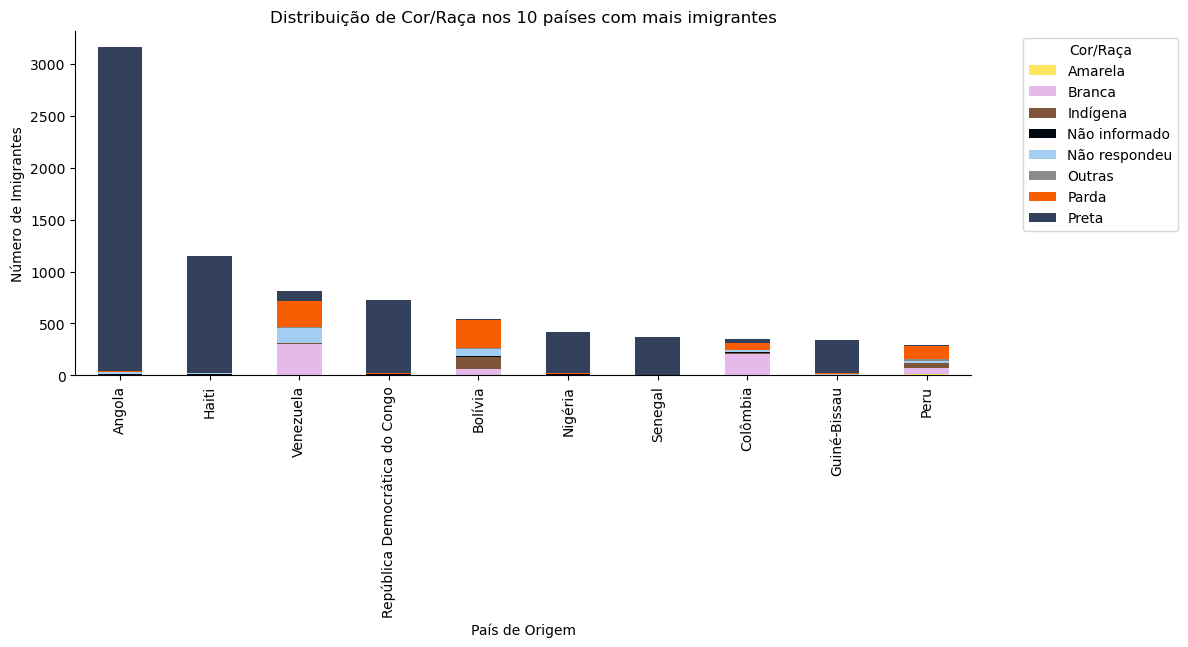

In [24]:
contagem_paises = tabela_nova['pais_origem'].value_counts()

dez_paises = contagem_paises[:10].index

colors = ['#ffe45e', '#E5BAEB', '#7f5539', '#000814', '#a3cef1', '#8b8c89', '#f85e00', '#33415c']

dados_filtrados = tabela_nova[tabela_nova['pais_origem'].isin(dez_paises)]

distribuicao_cor_raca = dados_filtrados.groupby(['pais_origem', 'cor_raca']).size().unstack(fill_value=0)

distribuicao_cor_raca.loc[dez_paises].plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

plt.title('Distribuição de Cor/Raça nos 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')
plt.xticks(rotation=45)
plt.legend(title='Cor/Raça', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.xticks(rotation=90)

for axis in ['top', 'right']:
    plt.gca().spines[axis].set_color(None)

    
plt.show()

# Quantidade Imigrantes por Ano

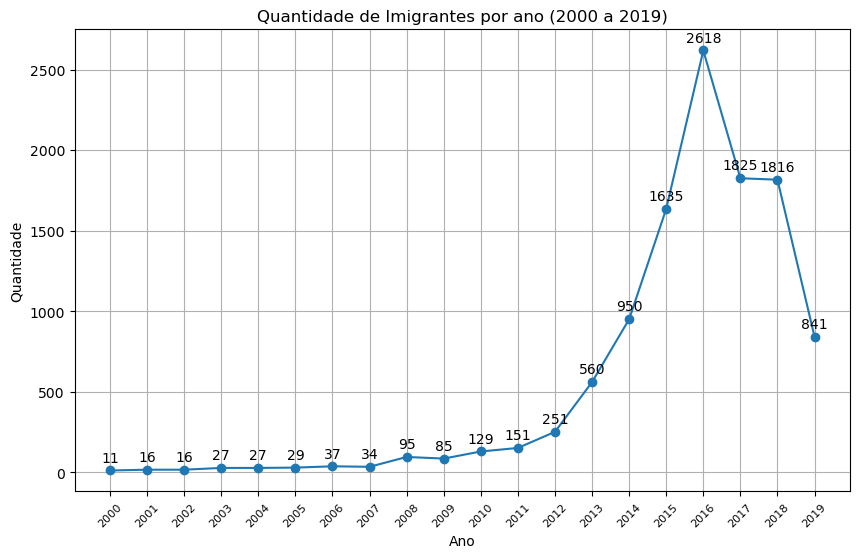

In [33]:

# Transformar os dados em um DataFrame
df_contagem_ano = pd.DataFrame(list(contagem_ano.items()), columns=['Ano', 'Quantidade'])

df_contagem_ano = df_contagem_ano[(df_contagem_ano['Ano'] >= 2000) & (df_contagem_ano['Ano'] <= 2019)]

df_contagem_ano = df_contagem_ano.sort_values(by='Ano', ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(df_contagem_ano['Ano'], df_contagem_ano['Quantidade'], marker='o', linestyle='-')

plt.title('Quantidade de Imigrantes por ano (2000 a 2019)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.xticks(range(2000, 2020), rotation=45, fontsize=8)  # Intervalo de 2 anos

for i, row in df_contagem_ano.iterrows():
    plt.text(row['Ano'], row['Quantidade'] + 35, str(row['Quantidade']), ha='center', va='bottom')  # Ajusta a posição dos rótulos

plt.grid(True)
plt.show()

# Regressão Linear Polinomial

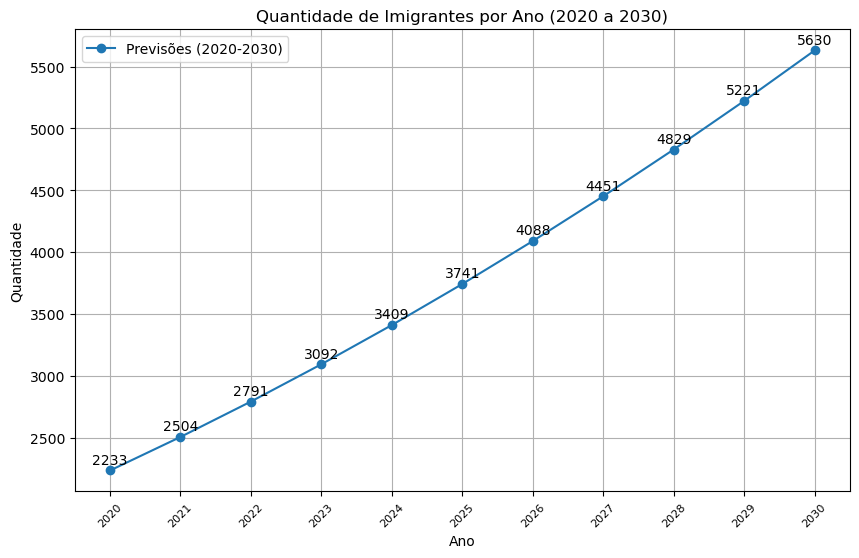

In [34]:
X = df_contagem_ano[['Ano']]
y = df_contagem_ano['Quantidade']

#transformar os dados para incluir termos polinomiais
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#ajustar o modelo de regressão polinomial
model = LinearRegression()
model.fit(X_poly, y)

#prever os valores de imigração de 2020 a 2030
anos_futuros = np.arange(2020, 2031).reshape(-1, 1)

anos_futuros_df = pd.DataFrame(anos_futuros, columns=['Ano'])
anos_futuros_poly = poly.transform(anos_futuros_df)
previsoes = model.predict(anos_futuros_poly)

plt.figure(figsize=(10, 6))
plt.plot(anos_futuros, previsoes, marker='o', linestyle='-', label='Previsões (2020-2030)')

plt.title('Quantidade de Imigrantes por Ano (2020 a 2030)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.xticks(range(2020, 2031, 1), rotation=45, fontsize=8)

for i in range(len(anos_futuros)):
    plt.text(anos_futuros[i], previsoes[i] + 28, f"{int(previsoes[i])}", ha='center', va='bottom')

plt.legend()
plt.grid(True)

plt.show()

# Regressão Linear Simples

D:\Arquivos de Programas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


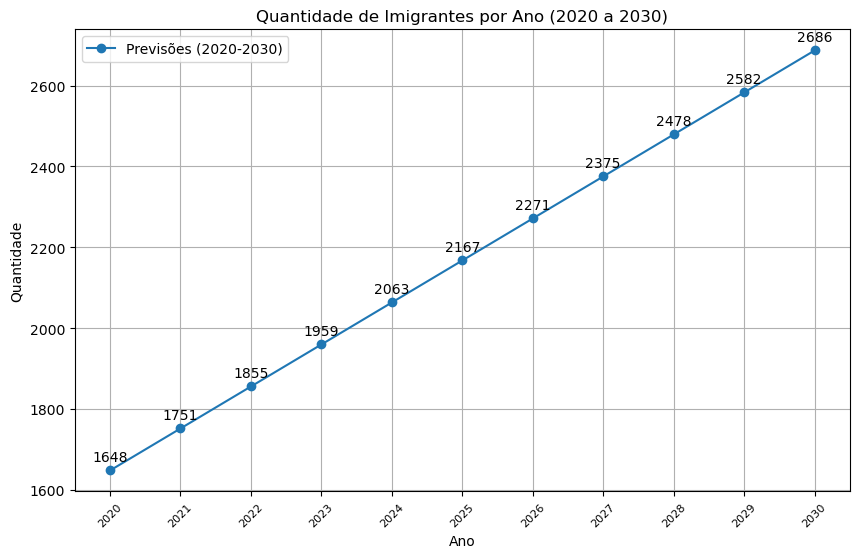

In [35]:
X = df_contagem_ano[['Ano']]
y = df_contagem_ano['Quantidade']

model = LinearRegression()
model.fit(X, y)

anos_futuros = np.arange(2020, 2031).reshape(-1, 1)
previsoes = model.predict(anos_futuros)

plt.figure(figsize=(10, 6))
plt.plot(anos_futuros, previsoes, marker='o', linestyle='-', label='Previsões (2020-2030)')

plt.title('Quantidade de Imigrantes por Ano (2020 a 2030)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.xticks(range(2020, 2031, 1), rotation=45, fontsize=8)

for i in range(len(anos_futuros)):
    plt.text(anos_futuros[i], previsoes[i] + 15, f"{int(previsoes[i])}", ha='center', va='bottom')

plt.legend()
plt.grid(True)

plt.show()